In [1]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from src.audio_hack import Audio

In [2]:
from os import listdir
from os.path import isfile, join

samples_dir = 'recordings'
onlyfiles = [join(samples_dir, f) for f in listdir(samples_dir) if isfile(join(samples_dir, f))]
onlyfiles

['recordings/127.0.0.1-1641634673-recording.wav',
 'recordings/test.mp3',
 'recordings/127.0.0.1-1641635531-recording.wav',
 'recordings/127.0.0.1-1641634673-recording.mp3']

In [3]:
sample_file = 'recordings/test.mp3'
print(os.path.isfile(sample_file))
print(sample_file)

True
recordings/test.mp3


In [4]:
x, sr = librosa.load(sample_file)
print(len(x))

/home/mihail/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


143360


In [5]:
Audio(x, sr)

In [6]:
def plot_signal(x_, sr_):
  plt.figure(figsize=(14, 5))
  librosa.display.waveplot(x_, sr_)
  plt.show()

In [7]:
from scipy import signal

def f_high(y,sr):
    b,a = signal.butter(10, 2000/(sr/2), btype='highpass')
    yf = signal.lfilter(b,a,y)
    return yf

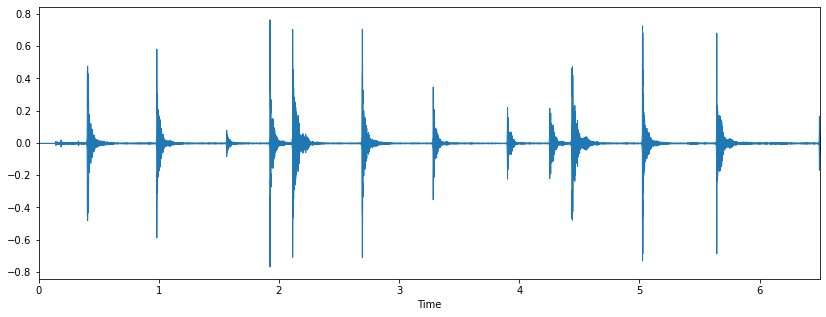

In [8]:
plot_signal(x, sr)

In [9]:
x_new = f_high(x, sr)

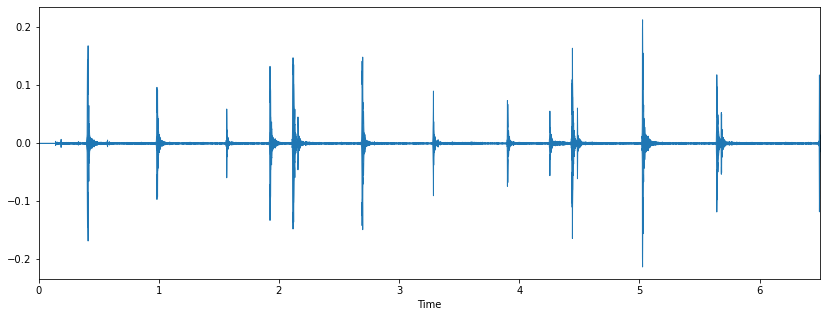

In [10]:
plot_signal(x_new, sr)

In [11]:
o_env = librosa.onset.onset_strength(x_new, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

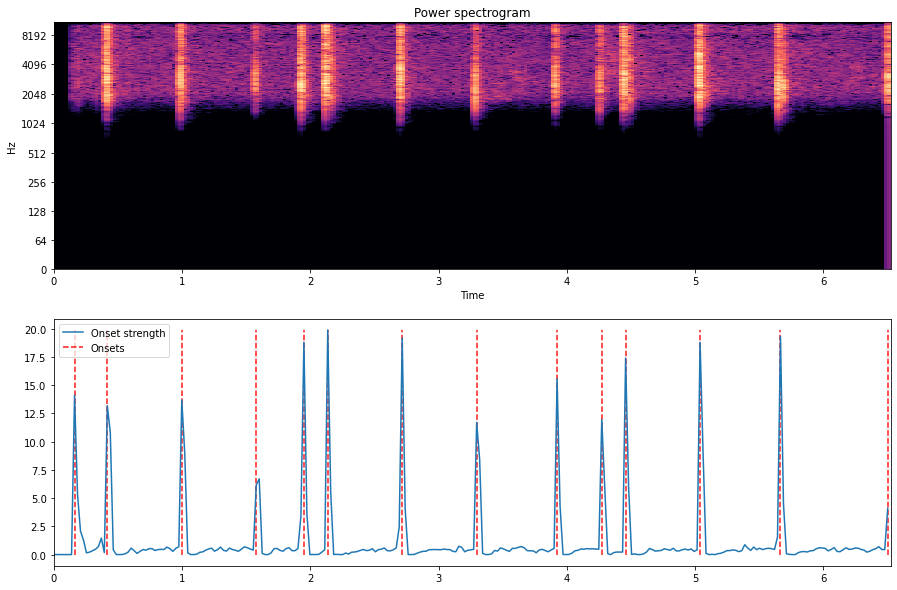

In [12]:
D = np.abs(librosa.stft(x_new))
plt.figure(figsize=(15,10))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)
plt.show()

In [13]:
print(onset_frames)
print(len(onset_frames))
print(times[onset_frames])

[  7  18  43  68  84  92 117 142 169 184 192 217 244 280]
14
[0.16253968 0.41795918 0.99845805 1.57895692 1.95047619 2.13623583
 2.71673469 3.29723356 3.92417234 4.27247166 4.45823129 5.03873016
 5.66566893 6.5015873 ]


In [14]:
from src.solver import Solver

solver = Solver()

In [15]:
solver.analyze(sample_file)

/home/mihail/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


dist=0.023219954648526078
onset_frames=[  7  18  43  68  83  92 116 142 169 184 192 217 244 280]
[7]
i=0 j=0
time=0.0
now!


/home/mihail/distractie/toacametru/src/solver.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  statistics['avg_beats'] = len(onset_frames) / time_dist(0, len(onset_frames) - 1)


{'max_beats': 1, 'avg_beats': inf, 'total': 1}